In [1]:
import pypsa
import pandas as pd
import numpy as np

In [2]:
# Lifespan
lifetime_wind = 25 # Jahre
lifetime_solar = 30 # Jahre

#Preise
solar_price = 1600000/lifetime_solar # Solarkosten [€/MW]  (ca. 21.3 €/MWh)
wind_price = 700000/lifetime_wind # Windkosten [€/MW]
steel_revenue = -200 # Erlöse [€/MWh]

# Profile
renewable_profile_solar = pd.read_csv("pv_lastprofil_test.CSV", usecols=["electricity"]) # Lastprofil EE [in %]
renewable_profile_solar = renewable_profile_solar["electricity"].astype(float)
renewable_profile_wind = pd.read_csv("wind_lastprofil_test.CSV", usecols=["electricity"]) # Lastprofil EE [in %]
renewable_profile_wind = renewable_profile_wind["electricity"].astype(float)

# Energiebedarf für 11 Mio Tonnen Stahl pro Jahr
energiebedarf_strom = 502.28 # Energiebedarf [MWh/Std] Strom 400 kWh/t Stahl
energiebedarf_wasserstoff = 2134.7 # Energiebedarf [MWh/Std] Wasserstoff 1700 kWh/t Stahl

# Effizienz
storage_loss = 0.001

In [3]:
network = pypsa.Network()
network.set_snapshots(range(8760))

In [4]:
# Bus
network.add("Bus", name = "electricity")
network.add("Bus", name = "hydrogen")
network.add("Bus", name = "ee")

In [5]:
# Generator Wind
network.add("Generator", name = "wind_energy", bus="ee",
            p_nom_extendable=True,  # Windparkleistung soll optimiert werden
            p_max_pu=renewable_profile_wind,
            capital_cost=wind_price)
# Generator Solar
network.add("Generator", name = "solar_energy", bus="ee",
            p_nom_extendable=True,  # Solarparkleistung soll optimiert werden
            p_max_pu=renewable_profile_solar,
            capital_cost=solar_price)

In [6]:
# Link Elektrolysator
network.add("Link", name = "electrolysator", bus0="electricity", bus1="hydrogen",
            efficiency=0.9,
            p_nom_extendable=True,  # Leistung Elektrolyseur soll dimensioniert werden
            capital_cost= 450000)  # Investitionskosten [€/MW]
# Link Selbstverbrauch
network.add("Link", name = "self_consumption", bus0="ee", bus1="electricity",
            marginal_cost=steel_revenue,
            p_nom_extendable= np.inf)

In [7]:
# Elektrischerspeicher
network.add("Store", name = "electricity_storage", bus= "electricity",
            e_nom_extendable=True,  # Kapazität Speicher soll dimensioniert werden
            capital_cost=450000,  # Investitionskosten [€/MWh]
            standing_loss=storage_loss,
            e_min_pu=0.0)
network.add("Store", name = "hydrogen_storage", bus= "hydrogen",
            e_nom_extendable=True,  # Kapazität Speicher soll dimensioniert werden
            capital_cost=27000,  # Investitionskosten [€/MWh]
            standing_loss=storage_loss,
            e_min_pu=0.0)

# Load Wasserstoff [MWh]
network.add("Load", name = "hydrogen_load", bus = "hydrogen",
           p_set=energiebedarf_wasserstoff)

# Load Strom [MWh]
network.add("Load", name = "electricity_load", bus = "electricity",
           p_set=energiebedarf_strom)

In [8]:
network.optimize(solver_name = 'gurobi')

Index(['electricity_storage', 'hydrogen_storage'], dtype='object', name='Store')
Index(['electricity', 'hydrogen', 'ee'], dtype='object', name='Bus')
Index(['electrolysator', 'self_consumption'], dtype='object', name='Link')
Index(['electricity_storage', 'hydrogen_storage'], dtype='object', name='Store')
Index(['electricity', 'hydrogen', 'ee'], dtype='object', name='Bus')
Index(['electrolysator', 'self_consumption'], dtype='object', name='Link')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter ServerTimeout to value 10


INFO:gurobipy:Set parameter ServerTimeout to value 10


Set parameter TokenServer to value "139.6.183.241"


INFO:gurobipy:Set parameter TokenServer to value "139.6.183.241"
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00, 29.29it/s]
INFO:linopy.io: Writing time: 2.21s


Read LP format model from file /tmp/linopy-problem-jni6so9z.lp


INFO:gurobipy:Read LP format model from file /tmp/linopy-problem-jni6so9z.lp


Reading time = 0.59 seconds


INFO:gurobipy:Reading time = 0.59 seconds


obj: 148926 rows, 70086 columns, 275915 nonzeros


INFO:gurobipy:obj: 148926 rows, 70086 columns, 275915 nonzeros


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)


INFO:gurobipy:Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)


INFO:gurobipy:


CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


INFO:gurobipy:CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 148926 rows, 70086 columns and 275915 nonzeros


INFO:gurobipy:Optimize a model with 148926 rows, 70086 columns and 275915 nonzeros


Model fingerprint: 0xdeb8ab6b


INFO:gurobipy:Model fingerprint: 0xdeb8ab6b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 1e+00]


INFO:gurobipy:  Matrix range     [1e-03, 1e+00]


  Objective range  [2e+02, 4e+05]


INFO:gurobipy:  Objective range  [2e+02, 4e+05]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [5e+02, 2e+03]


INFO:gurobipy:  RHS range        [5e+02, 2e+03]


Presolve removed 92017 rows and 30692 columns


INFO:gurobipy:Presolve removed 92017 rows and 30692 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 56909 rows, 39394 columns, 144447 nonzeros


INFO:gurobipy:Presolved: 56909 rows, 39394 columns, 144447 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.09s


INFO:gurobipy:Ordering time: 0.09s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 5


INFO:gurobipy: Dense cols : 5


 AA' NZ     : 1.313e+05


INFO:gurobipy: AA' NZ     : 1.313e+05


 Factor NZ  : 8.851e+05 (roughly 50 MB of memory)


INFO:gurobipy: Factor NZ  : 8.851e+05 (roughly 50 MB of memory)


 Factor Ops : 1.507e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.507e+07 (less than 1 second per iteration)


 Threads    : 10


INFO:gurobipy: Threads    : 10


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0  -1.34726354e+10 -3.42675202e+09  2.57e+04 3.58e+01  1.34e+08     3s


INFO:gurobipy:   0  -1.34726354e+10 -3.42675202e+09  2.57e+04 3.58e+01  1.34e+08     3s


   1   3.69061977e+10 -2.03399071e+11  3.84e+03 9.65e+02  2.91e+07    12s


INFO:gurobipy:   1   3.69061977e+10 -2.03399071e+11  3.84e+03 9.65e+02  2.91e+07    12s


   2   4.26959937e+10 -9.44844475e+10  3.39e-10 1.07e+02  4.06e+06    16s


INFO:gurobipy:   2   4.26959937e+10 -9.44844475e+10  3.39e-10 1.07e+02  4.06e+06    16s


   3   1.63311722e+10 -7.34493636e+09  1.30e-09 3.53e+00  3.55e+05    20s


INFO:gurobipy:   3   1.63311722e+10 -7.34493636e+09  1.30e-09 3.53e+00  3.55e+05    20s


   4   5.22093288e+09 -4.95097868e+09  5.34e-10 9.12e-01  1.40e+05    25s


INFO:gurobipy:   4   5.22093288e+09 -4.95097868e+09  5.34e-10 9.12e-01  1.40e+05    25s


   5   3.71125572e+09 -4.38821753e+09  1.34e-09 5.03e-01  1.09e+05    30s


INFO:gurobipy:   5   3.71125572e+09 -4.38821753e+09  1.34e-09 5.03e-01  1.09e+05    30s


   6   3.05586378e+09 -3.46767673e+09  7.61e-09 2.46e-01  8.60e+04    32s


INFO:gurobipy:   6   3.05586378e+09 -3.46767673e+09  7.61e-09 2.46e-01  8.60e+04    32s


   7   1.28819087e+09 -2.63328531e+09  3.99e-08 9.78e-02  5.11e+04    40s


INFO:gurobipy:   7   1.28819087e+09 -2.63328531e+09  3.99e-08 9.78e-02  5.11e+04    40s


   8   8.80462808e+08 -2.20991814e+09  6.69e-07 8.50e-02  4.00e+04    43s


INFO:gurobipy:   8   8.80462808e+08 -2.20991814e+09  6.69e-07 8.50e-02  4.00e+04    43s


   9   6.60209398e+08 -1.69657949e+09  9.00e-07 1.35e-02  3.01e+04    51s


INFO:gurobipy:   9   6.60209398e+08 -1.69657949e+09  9.00e-07 1.35e-02  3.01e+04    51s


  10  -5.70440280e+08 -1.65220488e+09  4.10e-06 9.90e-03  1.39e+04    59s


INFO:gurobipy:  10  -5.70440280e+08 -1.65220488e+09  4.10e-06 9.90e-03  1.39e+04    59s


  11  -8.69947748e+08 -1.53778059e+09  3.00e-06 4.94e-03  8.56e+03    69s


INFO:gurobipy:  11  -8.69947748e+08 -1.53778059e+09  3.00e-06 4.94e-03  8.56e+03    69s


  12  -9.11000334e+08 -1.45325590e+09  3.16e-06 1.89e-03  6.92e+03    74s


INFO:gurobipy:  12  -9.11000334e+08 -1.45325590e+09  3.16e-06 1.89e-03  6.92e+03    74s


  13  -1.00152258e+09 -1.42513268e+09  2.21e-06 8.55e-05  5.40e+03    77s


INFO:gurobipy:  13  -1.00152258e+09 -1.42513268e+09  2.21e-06 8.55e-05  5.40e+03    77s


  14  -1.02041425e+09 -1.38778137e+09  1.71e-06 5.78e-05  4.68e+03    90s


INFO:gurobipy:  14  -1.02041425e+09 -1.38778137e+09  1.71e-06 5.78e-05  4.68e+03    90s


INFO:gurobipy:


Barrier performed 14 iterations in 89.60 seconds (0.44 work units)


INFO:gurobipy:Barrier performed 14 iterations in 89.60 seconds (0.44 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   40629   -1.2109050e+09   0.000000e+00   0.000000e+00     92s


INFO:gurobipy:   40629   -1.2109050e+09   0.000000e+00   0.000000e+00     92s


INFO:gurobipy:


Solved in 40629 iterations and 92.60 seconds (3.71 work units)


INFO:gurobipy:Solved in 40629 iterations and 92.60 seconds (3.71 work units)


Optimal objective -1.210904985e+09


INFO:gurobipy:Optimal objective -1.210904985e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70086 primals, 148926 duals
Objective: -1.21e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-ext-p-lower, Generator-ext-p-upper, Link-ext-p-lower, Link-ext-p-upper, Store-ext-e-lower, Store-ext-e-upper, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

In [20]:
# optimieren
solar_power_opt = network.generators.loc["solar_energy", "p_nom_opt"]
wind_power_opt = network.generators.loc["wind_energy", "p_nom_opt"]
electrolyzer_power_opt = network.links.loc["electrolysator", "p_nom_opt"]
electricity_storage_capacity_opt = network.stores.loc["electricity_storage", "e_nom_opt"]
hydrogen_storage_capacity_opt = network.stores.loc["hydrogen_storage", "e_nom_opt"]

# Ausgabe
print(f"Optimale Leistung der Solaranlage: {solar_power_opt} MW")
print(f"Optimale Leistung der Windkraftanlage: {wind_power_opt} MW")
print(f"Optimale Leistung des Elektrolyseurs: {electrolyzer_power_opt} MW")
print(f"Optimale Kapazität des Elektrischenspeichers: {electricity_storage_capacity_opt} MWh")
print(f"Optimale Kapazität des Wasserstoffspeichers: {hydrogen_storage_capacity_opt} MWh")

Optimale Leistung der Solaranlage: 3283.6509219782165 MW
Optimale Leistung der Windkraftanlage: 48929.20860794937 MW
Optimale Leistung des Elektrolyseurs: 2508.0843676979202 MW
Optimale Kapazität des Elektrischenspeichers: 320.03104600993845 MWh
Optimale Kapazität des Wasserstoffspeichers: 39606.67744221197 MWh


Gesamt installierte Stromleistung: 52212.86 MW
Durchgehende Stahlproduktionsleistung: 2636.98 MW
Elektrolysator Leistung: 2508.08 MW


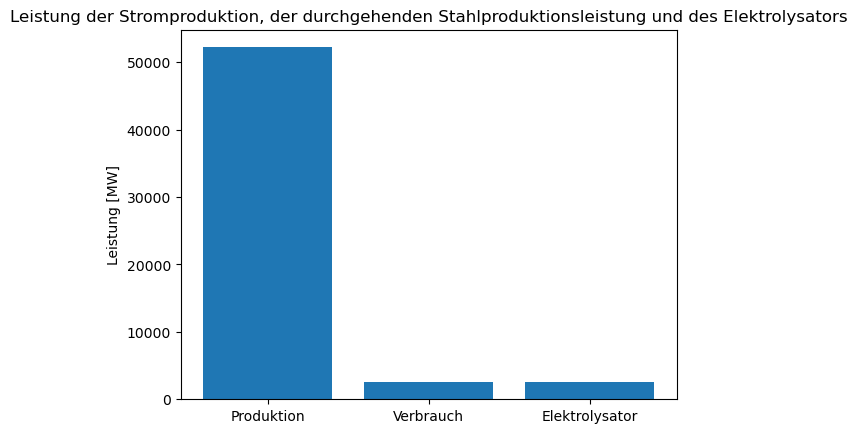

In [21]:
total_power_generator = solar_power_opt + wind_power_opt
average_power_usage = energiebedarf_strom + energiebedarf_wasserstoff

print(f"Gesamt installierte Stromleistung: {total_power_generator:.2f} MW")
print(f"Durchgehende Stahlproduktionsleistung: {average_power_usage:.2f} MW")
print(f"Elektrolysator Leistung: {electrolyzer_power_opt:.2f} MW")

# Barplot für die Darstellung der Leistung
labels_power = ["Produktion", "Verbrauch", "Elektrolysator"]
power = [
    total_power_generator,
    average_power_usage,
    electrolyzer_power_opt,
]

# Erstellung Barplot
x_1 = range(len(labels_power))
plt.bar(x_1, power)
plt.xticks(x_1, labels_power)
plt.ylabel("Leistung [MW]")
plt.title("Leistung der Stromproduktion, der durchgehenden Stahlproduktionsleistung und des Elektrolysators")
plt.show()

<Axes: xlabel='snapshot'>

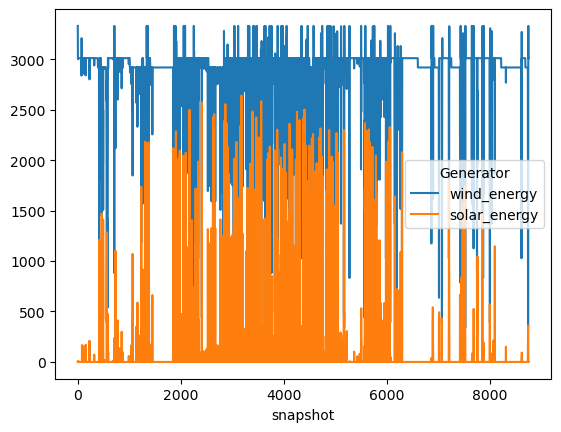

In [22]:
network.generators_t.p.plot()

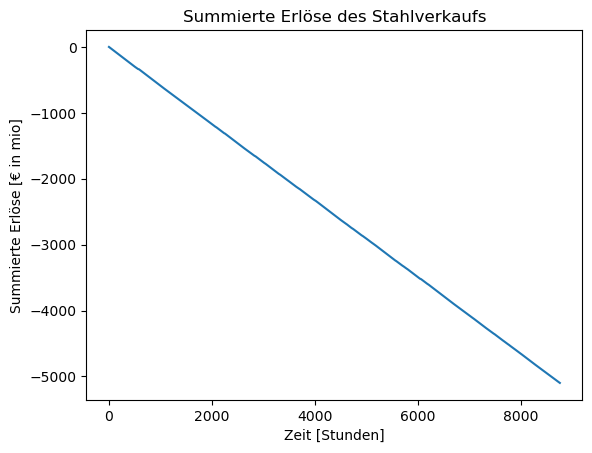

In [23]:
import matplotlib.pyplot as plt

# Leistung im Link
link_power = network.links_t.p0["self_consumption"]
link_marginal_cost = network.links.loc["self_consumption", "marginal_cost"]

# Erlöse summiert
link_revenue = link_power * link_marginal_cost
cumulative_revenue = link_revenue.cumsum()/1000000

# Ploter
plt.plot(cumulative_revenue.index, cumulative_revenue)
plt.title("Summierte Erlöse des Stahlverkaufs")
plt.xlabel("Zeit [Stunden]")
plt.ylabel("Summierte Erlöse [€ in mio]")
plt.show()


Investitionskosten Solar: 175.13 mio €
Investitionskosten Wind: 1370.02 mio €
Investitionskosten Elektrolyseur: 1128.64 mio €
Investitionskosten Stromspeicher: 144.01 mio €
Investitionskosten Wasserstoffspeicher: 1069.38 mio €
Gesamtkosten: 3887.18 mio €


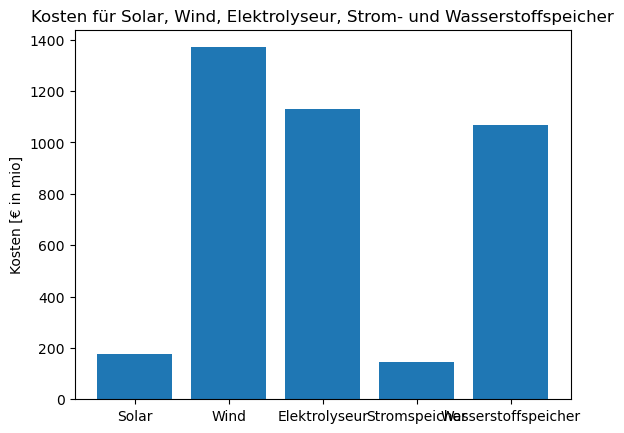

In [24]:
# Investitionskosten EE
solar_investment_cost = solar_power_opt * solar_price / 1000000
wind_investment_cost = wind_power_opt * wind_price / 1000000

# Investitionskosten Elektrolysator
electrolyzer_investment_cost = electrolyzer_power_opt * 450000 / 1000000

# Investitionskosten Stromspeicher
electricity_storage_investment_cost = electricity_storage_capacity_opt * 450000 / 1000000

# Investitionskosten Wasserstoffspeicher
hydrogen_storage_investment_cost = hydrogen_storage_capacity_opt * 27000 / 1000000

# Investitionskosten gesamt
total_investment_costs = solar_investment_cost + wind_investment_cost + electrolyzer_investment_cost + electricity_storage_investment_cost + hydrogen_storage_investment_cost

# Ausgabe der Kosten
print(f"Investitionskosten Solar: {solar_investment_cost:.2f} mio €")
print(f"Investitionskosten Wind: {wind_investment_cost:.2f} mio €")
print(f"Investitionskosten Elektrolyseur: {electrolyzer_investment_cost:.2f} mio €")
print(f"Investitionskosten Stromspeicher: {electricity_storage_investment_cost:.2f} mio €")
print(f"Investitionskosten Wasserstoffspeicher: {hydrogen_storage_investment_cost:.2f} mio €")
print(f"Gesamtkosten: {total_investment_costs:.2f} mio €")

# Barplot für die Darstellung der Kosten
labels_cost = ["Solar", "Wind", "Elektrolyseur", "Stromspeicher", "Wasserstoffspeicher"]
investment_costs = [
    solar_investment_cost,
    wind_investment_cost,
    electrolyzer_investment_cost,
    electricity_storage_investment_cost,
    hydrogen_storage_investment_cost
]

# Erstellung Barplot
x_2 = range(len(labels_cost))
plt.bar(x_2, investment_costs)
plt.xticks(x_2, labels_cost)
plt.ylabel("Kosten [€ in mio]")
plt.title("Kosten für Solar, Wind, Elektrolyseur, Strom- und Wasserstoffspeicher")
plt.show()